<a href="https://colab.research.google.com/github/Vivek-Joshi17/CNN_neural_network/blob/main/CNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the file
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-04 05:18:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf, 2607:f8b0:4023:c03::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  89.2MB/s    in 1.2s    

2024-01-04 05:18:17 (89.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [4]:
import os
#walk through pizza_steak directory and list number of files

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)}images in '{dirpath}'.")

There are 2 directories and 0images in 'pizza_steak'.
There are 2 directories and 0images in 'pizza_steak/train'.
There are 0 directories and 750images in 'pizza_steak/train/pizza'.
There are 0 directories and 750images in 'pizza_steak/train/steak'.
There are 2 directories and 0images in 'pizza_steak/test'.
There are 0 directories and 250images in 'pizza_steak/test/pizza'.
There are 0 directories and 250images in 'pizza_steak/test/steak'.


In [5]:
### Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
# get the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names =np.array(sorted([item.name for item in data_dir.glob("*")]))
# it creat a list of class_names frim the subdirectories

print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

#A function which picks images of pizza/steak randomly
def view_random_images(target_dir,target_class):
  # set up target directory
  target_folder =target_dir+"/" +target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # read and plot image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"Image shape: {img.shape}")

  return img

['2549316.jpg']
Image shape: (512, 512, 3)


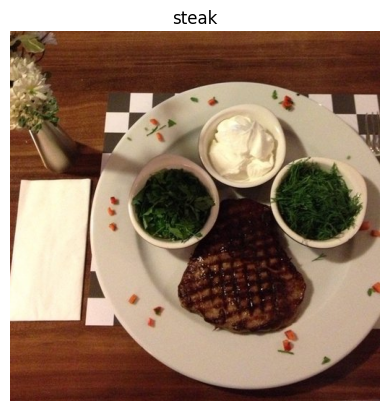

In [8]:
# view random image from training dataset
img = view_random_images(target_dir="pizza_steak/train",
                        target_class="steak")

#An end to end example

A convolutional neural network to find pattern in our images , more specifically we need a way to :

* load our images
* preprocess our images
* build a cnn to find patterns in our images
* compile our cnn
* fit the cnn to our training data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data(get all of the pixel values between 0 and 1 also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir ="/content/pizza_steak/train"
test_dir ="/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               seed=42)

###A basic CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation ="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding ="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

###Compile CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### Fit the model
history_1 = model_1.fit(train_data,epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data =valid_data,
                        validation_steps=len(valid_data)
                        )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 278ms/step - loss: 0.5860 - accuracy: 0.6887 - val_loss: 0.4218 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4441 - accuracy: 0.8153 - val_loss: 0.4154 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4016 - accuracy: 0.8267 - val_loss: 0.3532 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3552 - accuracy: 0.8540 - val_loss: 0.3334 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.2594 - accuracy: 0.9047 - val_loss: 0.3121 - val_accuracy: 0.8760


In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [13]:
### Doing image classification with regression model
tf.random.set_seed(42)

#Regression model for classification
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data =valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 111ms/step - loss: 0.6937 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6927 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6927 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6927 - accuracy: 0.4753 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
#sumaary of model_2
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1), model_2 not performing well.Improving model_2

In [18]:
#set the random seed
tf.random.set_seed(42)

#creating the model(same as model_2 with different params)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation ="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

#compile the model_3
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fitting the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 8s 113ms/step - loss: 3.6103 - accuracy: 0.6227 - val_loss: 2.6711 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 1.2777 - accuracy: 0.6833 - val_loss: 0.5746 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.7214 - accuracy: 0.7233 - val_loss: 1.3082 - val_accuracy: 0.6520
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.8755 - accuracy: 0.7260 - val_loss: 0.6878 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.5821 - accuracy: 0.7913 - val_loss: 0.6407 - val_accuracy: 0.7500


In [19]:
#model_3 summary comparision with model_1 and model_2
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model_3 has 500 times more trainable params but still it has accuracy of 75% which is better than model_2 but far less than our CNN model model_1